In [0]:
import pandas as pd

In [0]:
from google.colab import files

In [0]:
uploaded=files.upload()

Saving amazon_alexa.tsv to amazon_alexa (2).tsv


In [0]:
import io

In [0]:
alexa=pd.read_csv('amazon_alexa.tsv',sep='\t')

In [157]:
alexa.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
alexa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [0]:
alexa.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [0]:
alexa['feedback'].value_counts()

1    2893
0     257
Name: feedback, dtype: int64

Negative feedbacks ae very less compared to positive feedback

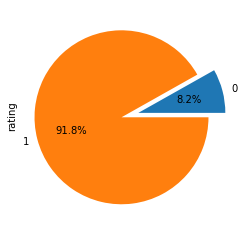

In [0]:
#Percentage of peoples liked and disliked alexa
alexa.groupby('feedback').rating.count().plot(kind='pie',autopct='%1.1f%%',explode=(0.1,0.1))

seems more no of peoples liked Alexa

In [158]:
#Length of reviews given by people
alexa['length']=alexa.verified_reviews.apply(len)
alexa.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


Text(0.5, 1.0, 'Avg length of words by happy and unhappy people')

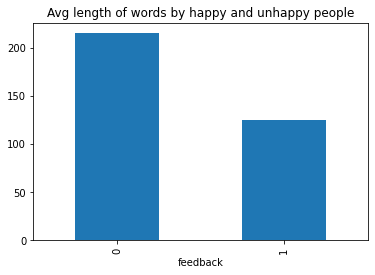

In [0]:
alexa.groupby('feedback').length.mean().plot(kind='bar')
plt.title('Avg length of words by happy and unhappy people')

unhappy peoples expressed more than happy peoples

Text(0.5, 1.0, 'Avg length vs ratings')

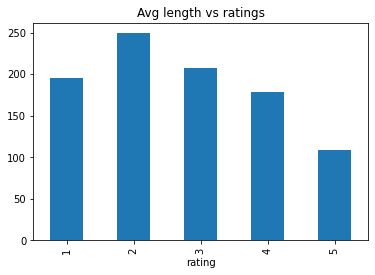

In [0]:
alexa.groupby('rating').length.mean().plot(kind='bar')
plt.title('Avg length vs ratings')

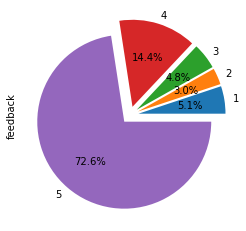

In [0]:
#Rating Distribution
alexa.groupby('rating').feedback.count().plot(kind='pie',autopct='%1.1f%%',explode=(0.1,0.1,0.1,0.1,0.1))

Let us visualize some words which people use for expressing positive as well as negative reviews

In [0]:
#Positive words
good=alexa[alexa.feedback==1].verified_reviews.unique().tolist()
good=" ".join(good)

In [160]:
from wordcloud import WordCloud
cv=WordCloud().generate(good)
cv

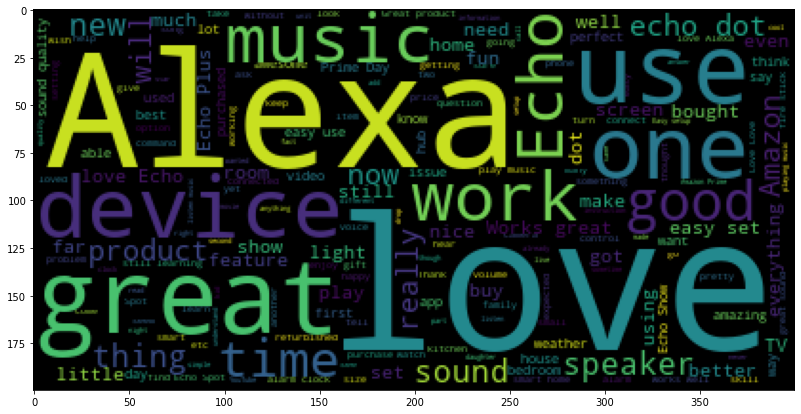

In [161]:
plt.figure(figsize=(14,7))
plt.imshow(cv)

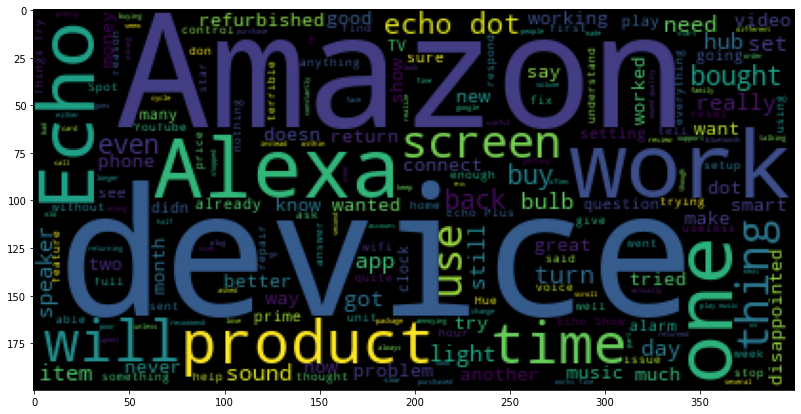

In [162]:
#Negative words
bad=alexa[alexa.feedback==0].verified_reviews.unique().tolist()
bad=(" ").join(bad)
cv=WordCloud().generate(bad)
plt.figure(figsize=(14,7))
plt.imshow(cv)

There are some words common in positive and negative reviews, so we need to remove these common words

In [0]:
#import nltk
#nltk.download('stopwords')

In [0]:
#comparing both wordcloud and creating a list of words that occur in both oftenly including stopwords
common=["Amazon","Alexa","Echo","one","Work","poduct"]
from nltk.corpus import stopwords
stop=stopwords.words("english")
stop.extend(["Amazon","Alexa","one","Echo","Product","amazon","alexa","thing","echo","dot","use"])

There are a couple of extra non alphabetic characters and numbers present in the review section. So we need to remove those undesirable characters for creating a better model.

In [0]:
#converting to lower case
alexa.verified_reviews=alexa.verified_reviews.str.lower()

In [0]:
#Removing special characters ("[^a-z]">> This signifies that replace everything apart from lower case alphabets with white space)
alexa.verified_reviews=alexa.verified_reviews.str.replace("[^a-z]"," ")

In [0]:
#split into list
alexa.verified_reviews=alexa.verified_reviews.str.split()

In [167]:
alexa.verified_reviews

0                                        [love, my, echo]
1                                             [loved, it]
2       [sometimes, while, playing, a, game, you, can,...
3       [i, have, had, a, lot, of, fun, with, this, th...
4                                                 [music]
                              ...                        
3145    [perfect, for, kids, adults, and, everyone, in...
3146    [listening, to, music, searching, locations, c...
3147    [i, do, love, these, things, i, have, them, ru...
3148    [only, complaint, i, have, is, that, the, soun...
3149                                               [good]
Name: verified_reviews, Length: 3150, dtype: object

In [0]:
alexa.verified_reviews=alexa.verified_reviews.apply(lambda x: [word for word in x if word not in stop])

In [0]:
alexa.verified_reviews=alexa.verified_reviews.apply(lambda x: " ".join(word for word in x))

In [170]:
alexa.verified_reviews

0                                                    love
1                                                   loved
2       sometimes playing game answer question correct...
3       lot fun yr old learns dinosaurs control lights...
4                                                   music
                              ...                        
3145                         perfect kids adults everyone
3146    listening music searching locations checking t...
3147    love things running entire home tv lights ther...
3148    complaint sound quality great mostly commands ...
3149                                                 good
Name: verified_reviews, Length: 3150, dtype: object

Now the stopwords and common word has been removed. We can keep on adding irrelevant word to stop list and run the code again for better model creation

Again creating wordcloud

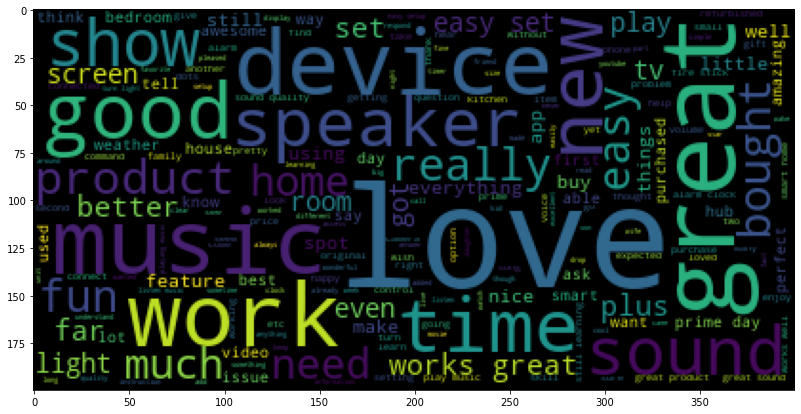

In [171]:
#positive word
good=alexa[alexa.feedback==1].verified_reviews.unique().tolist()
good=" ".join(good)
from wordcloud import WordCloud
cv=WordCloud().generate(good)
plt.figure(figsize=(14,7))
plt.imshow(cv)

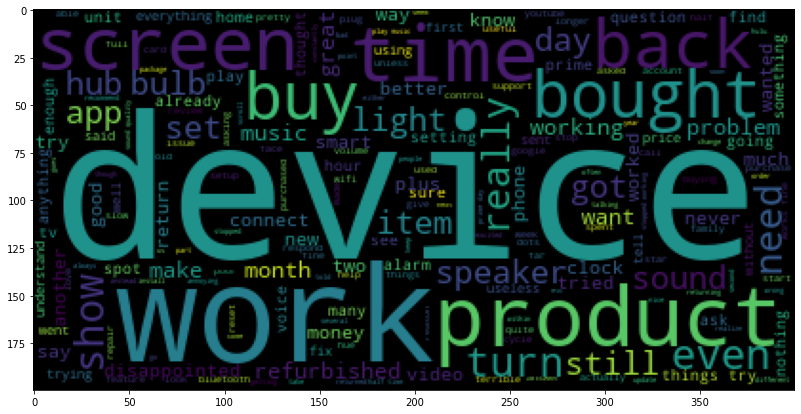

In [172]:
#Negative Reviews
bad=alexa[alexa.feedback==0].verified_reviews.unique().tolist()
bad=" ".join(bad)
from wordcloud import WordCloud
cv=WordCloud().generate(bad)
plt.figure(figsize=(14,7))
plt.imshow(cv)

Now our wordcloud look a bit better with different work, Removing irrelevant words can help in attaining great accuracy.

Now we can go for Sentiment Analysis using some common models like Decison tree, Random Forest and SVM and compare the accuracies

In [0]:
alexa.verified_reviews=alexa.verified_reviews.str.split()

In [174]:
alexa.verified_reviews

0                                                  [love]
1                                                 [loved]
2       [sometimes, playing, game, answer, question, c...
3       [lot, fun, yr, old, learns, dinosaurs, control...
4                                                 [music]
                              ...                        
3145                    [perfect, kids, adults, everyone]
3146    [listening, music, searching, locations, check...
3147    [love, things, running, entire, home, tv, ligh...
3148    [complaint, sound, quality, great, mostly, com...
3149                                               [good]
Name: verified_reviews, Length: 3150, dtype: object

In [0]:
#using wordlemmatizer to remove any plual word like "cats" will become "cat"
#nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wll=WordNetLemmatizer()
alexa.verified_reviews=alexa.verified_reviews.apply(lambda x: [wll.lemmatize(word) for word in x])

In [0]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
alexa.verified_reviews=alexa.verified_reviews.apply(lambda x: " ".join([ps.stem(word) for word in x]))

In [177]:
alexa.head(10)

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,love,1,13
1,5,31-Jul-18,Charcoal Fabric,love,1,9
2,4,31-Jul-18,Walnut Finish,sometim play game answer question correctli sa...,1,195
3,5,31-Jul-18,Charcoal Fabric,lot fun yr old learn dinosaur control light pl...,1,172
4,5,31-Jul-18,Charcoal Fabric,music,1,5
5,5,31-Jul-18,Heather Gray Fabric,receiv gift need anoth bluetooth someth play m...,1,172
6,3,31-Jul-18,Sandstone Fabric,without cellphon cannot mani featur ipad see g...,1,365
7,5,31-Jul-18,Charcoal Fabric,think th purchas work get everi room hous real...,1,221
8,5,30-Jul-18,Heather Gray Fabric,look great,1,11
9,5,30-Jul-18,Heather Gray Fabric,love listen song heard sinc childhood get news...,1,114


Now our data set seems to be ready for furthur process. Since the machine wont understand meaning of these words so we need to vectorize them. We will create multiple models.

1. Supervised learning

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(alexa.verified_reviews)
X=X.toarray()

In [0]:
y=alexa.feedback.tolist()
import numpy as np
y=np.asarray(y)

In [182]:
X.shape,y.shape

((3150, 2760), (3150,))

Converted all words to vectors. Now we will split the data into training and test data

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [184]:
from sklearn.tree import DecisionTreeClassifier
DC=DecisionTreeClassifier()
DC.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [187]:
y_predict_DC=DC.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(y_test,y_predict_DC)
accuracy_score

0.9333333333333333

In [0]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,y_train)
y_predict_RF=RF.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score

In [195]:
accuracy_score=accuracy_score(y_test,y_predict_RF)
accuracy_score

0.9444444444444444

In [196]:
from sklearn import svm
svm=svm.SVC()
svm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [198]:
y_predict_svm=svm.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score=accuracy_score(y_test,y_predict_svm)
accuracy_score

0.9253968253968254